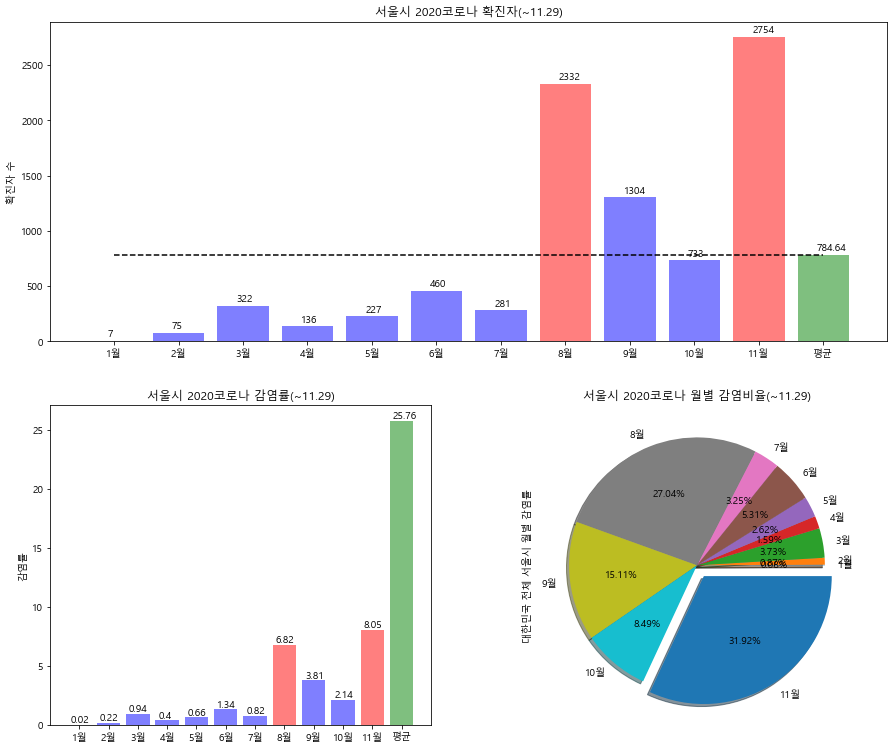

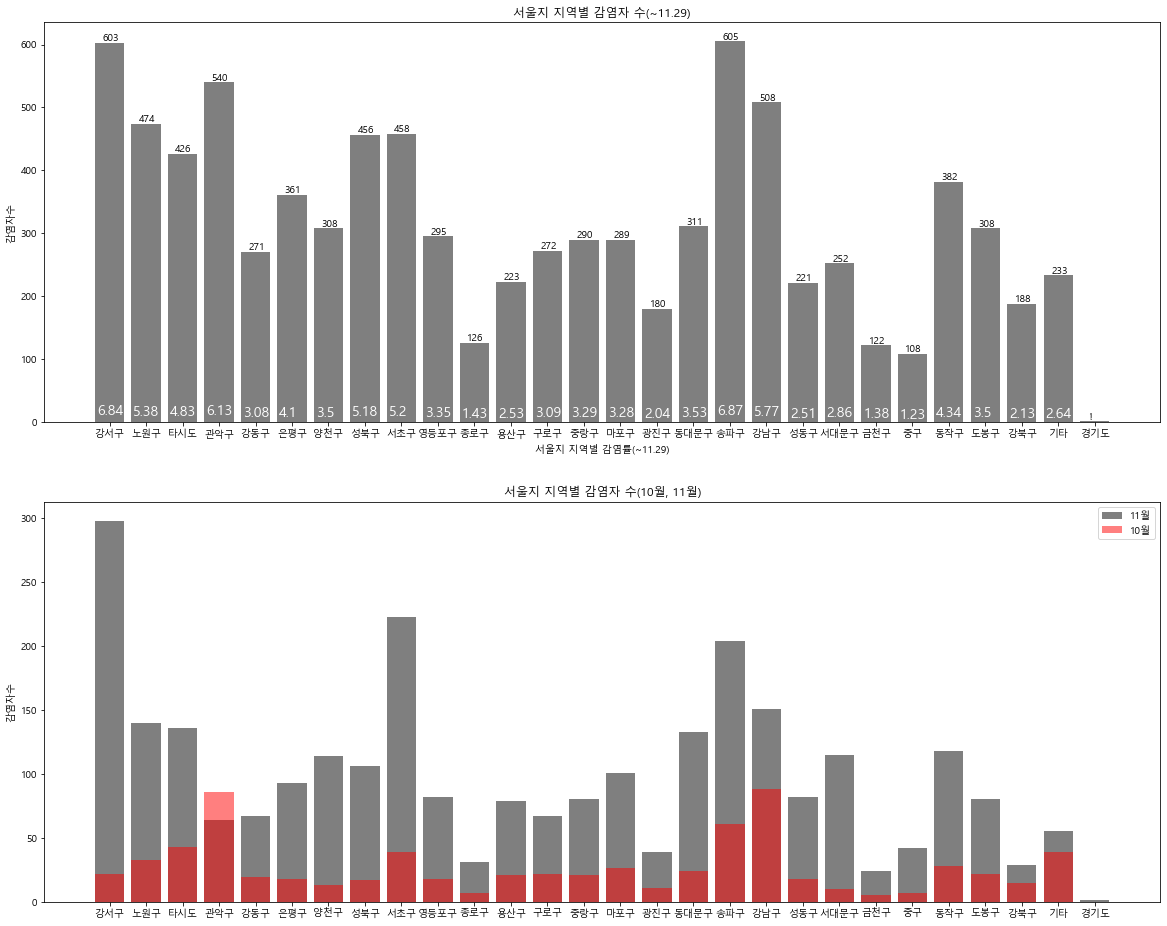

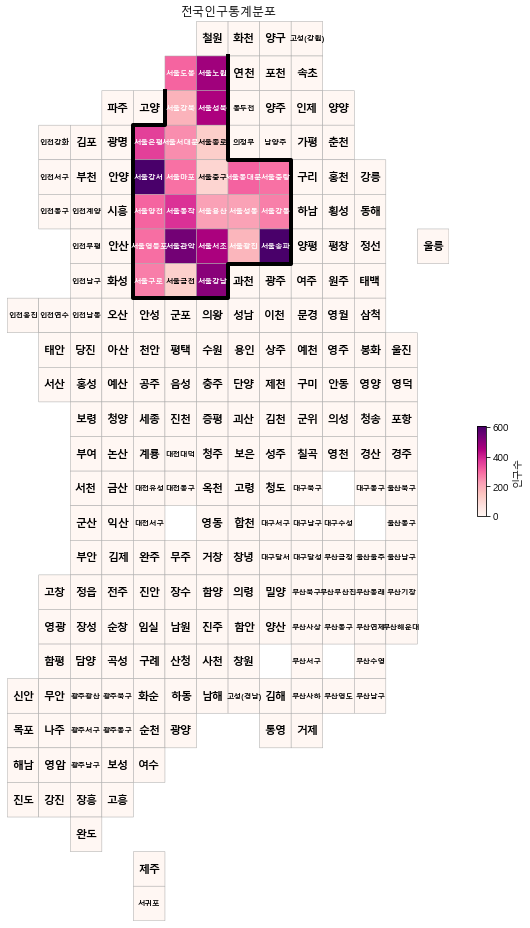

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


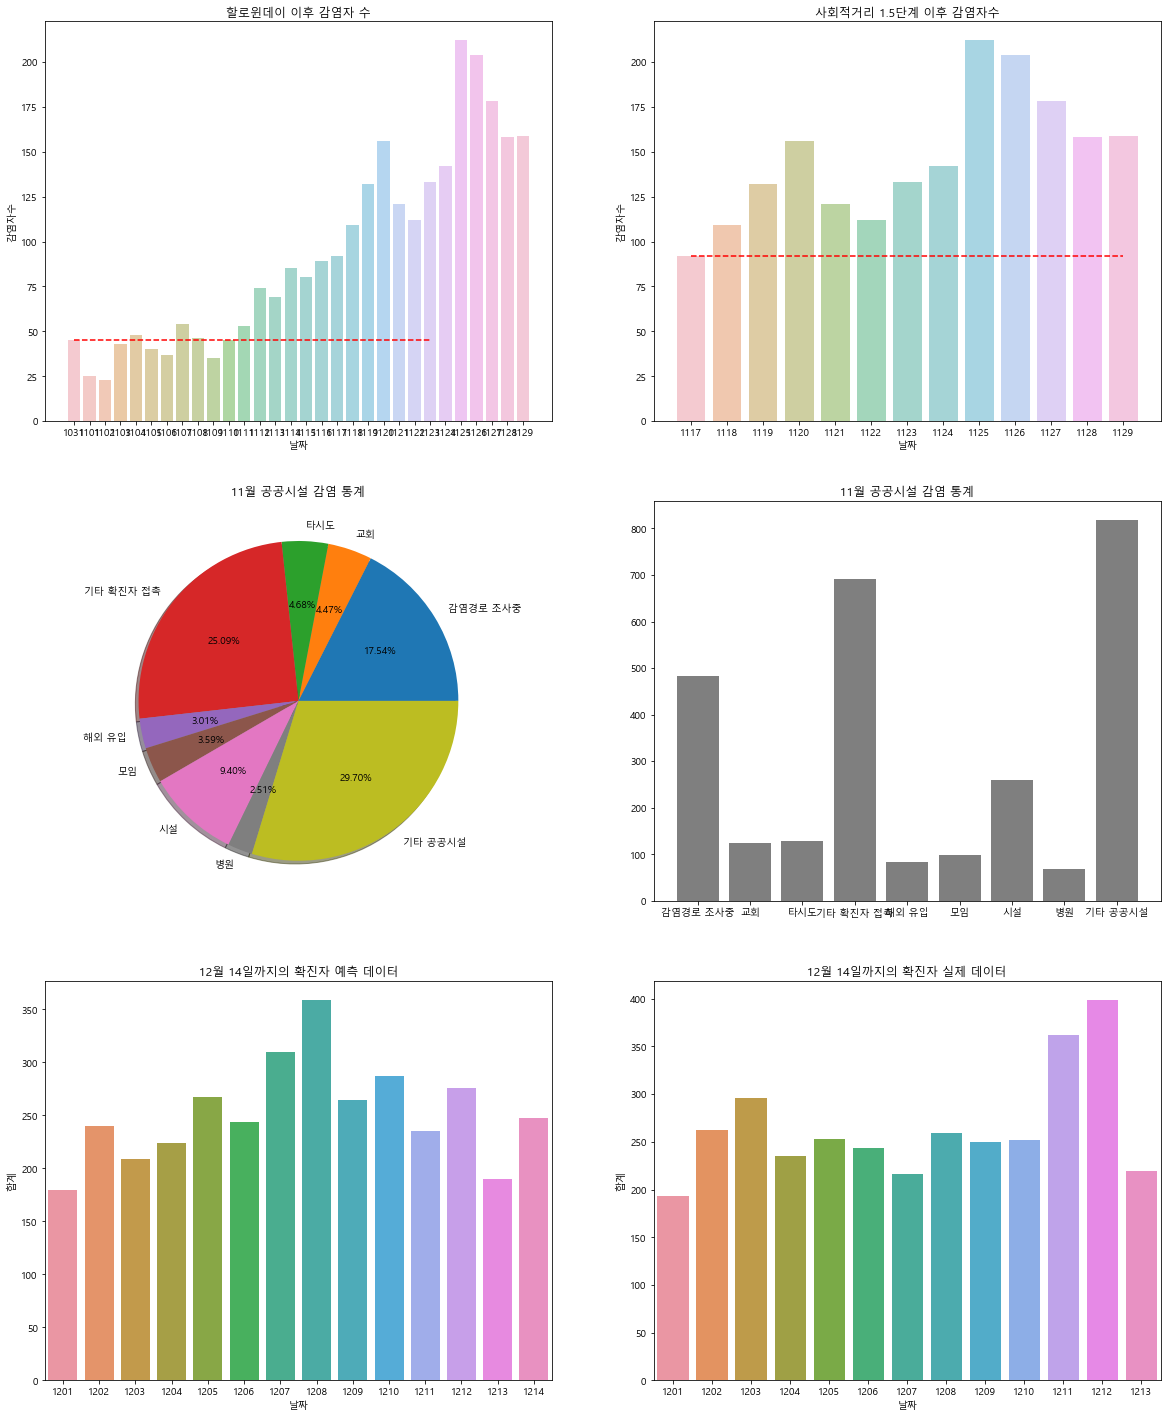

In [4]:
#!/usr/bin/env python
# coding: utf-8

# ### 서울시의 코로나 19 확진자 수가 확 늘어남에 따라 위험도를 알기 위해 프로젝트를 계획했습니다.
# 
# #### 프로젝트는 11월30일까지의 데이터만 수집하고 처리했습니다.
# #### 서울시의 11월까지의 전체 확진자 수, 감염률, 감염비률, 지역별 감염자 수, 지역별 감염자 수를 통한 위치 정보 시각화를 시각화 했습니다.
# 
# #### 서울시는 할로윈데이 이후로 확진자 수가 엄청나게 증가했습니다.
# #### 할로윈데이 이후 10월 31일 이후 확진자 증가량을 확인할 수 있도록 했습니다.
# #### 그 후 사회적 거리두기 단계가 올라감에 따라 확진자의 증가량, 감소량을 확인하도록 했습니다.
# 
# #### 11월에 서울시 확진자가 확 증가함에 따라 공공시절 확진자 통계를 확인할 수 있도록 했습니다.
# #### 회귀 분석을 통해 12월의 확진자를 예측해보았습니다.

# In[2]:



import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

matplotlib.rcParams['font.family'] = 'Malgun Gothic'     
matplotlib.rcParams['axes.unicode_minus'] = False 
bc = pd.read_csv('C:\\Temp\\seoulCorona1130.csv', encoding="CP949")

def showMap(blockedMap, targetData, strTitle, strColor, gamma):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData
    line = [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)]
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    cmapname = strColor
    plt.figure(figsize=(8, 13))
    plt.title(strTitle)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        dispname = row['shortName']

        
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 7.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    ys, xs = zip(*line)
    plt.plot(xs, ys, c='black', lw=4)
    plt.gca().invert_yaxis()
    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(targetData)
    plt.tight_layout()
    
    plt.savefig('c:\\Temp\\' + targetData + '.png')

    plt.show()
    
def getNeedData_Month(totalData):
    chartData = totalData[(totalData['확진월'] == 1)]  
    df = pd.DataFrame(chartData.sum()).T
    pieData = pd.DataFrame({u'월':'1월', u'월합계':df['확진월']})
    for types in range(2,12):
        df = totalData[(totalData[u'확진월'] == types)]
        df2 = pd.DataFrame(df.sum()).T
        record =pd.DataFrame({u'월':str(types)+'월', u'월합계':df2['확진월']//types})
        pieData = pieData.append(record, ignore_index=True)
    return pieData

def getNeedData_local(totalData, local):
    chartData = totalData[(totalData['지역'] == '강서구')] 
    pieData = pd.DataFrame([{u'지역':'강서구', u'합계':len(chartData['지역'])}])
    for types in local:
        df = totalData[(totalData['지역'] == types)]
        record =pd.DataFrame([{u'지역':types, u'합계':len(df['지역'])}])
        pieData = pieData.append(record, ignore_index=True)
    return pieData

def AVGData_Month(totalData):
    total_count = len(bc)
    korea = 34201 #11월29일 한국 확진자수
    sum = total_count / korea * 100
    seoul = [round(i/korea * 100,2) for i in totalData['월합계']]
    seoul.append(round(sum,2))
    return seoul

def AVGData_local(totalData):
    total_count = totalData['합계'].sum()
    for i in totalData['합계']:
        seoul = [round(i/total_count * 100,2) for i in totalData['합계']] 
    return seoul
        
def DateData(totalData,start,end):
    Halloween = totalData[(totalData['확진날짜'] >= start)]
    Halloween = Halloween[(Halloween['확진날짜'] <= end)]
    #Halloween = getNeedData_Month(Halloween)
    date = Halloween['확진날짜'].unique()
    date = list(date)
    date.sort()
    
    pieData = pd.DataFrame()
    #print(totalData) ##여기부분부터 해야해
    for types in date:
        df = Halloween[(Halloween['확진날짜'] == types)]
        df2 = pd.DataFrame(df.sum()).T
        record =pd.DataFrame({u'날짜':str(types), u'합계':df2['확진날짜']/types})
        pieData = pieData.append(record, ignore_index=True)
    #print(df['확진날짜'])
    return pieData
    
    
      
#data = pd.DataFrame({'확진일':bc['확진일'],'지역':bc['지역'],'접촉력':bc['접촉력']})

#서울시 2020코로나 확진자
date = np.array([int(i.replace('.','')) for i in bc['확진일']]) #확진일 문자열 데이터를 정수로 처리 

bc['확진월'] = date //100
totalDataMonth = getNeedData_Month(bc)

#서울시 코로나 감염률.
seoul_p = AVGData_Month(totalDataMonth)

#평균넣기
total_mean = round(totalDataMonth['월합계'].mean(),2)
record = pd.DataFrame([{u'월':'평균',u'월합계':total_mean}])
totalDataMonth=totalDataMonth.append(record, ignore_index=True)
MonthList = [i for i in totalDataMonth['월']]
totalDataPersent=pd.DataFrame({'월':MonthList,'감염률':seoul_p})
totalDataMonth['감염률']=totalDataPersent['감염률']

#pie차트 표현을 위해 평균값 제거.    
totalDataPersent = totalDataPersent.drop(len(totalDataPersent)-1,axis=0)

#도시별 감염자수 
local = bc['지역'].unique()
local = list(local)
local.remove('강서구')
total_local = getNeedData_local(bc,local)
#print(total_local)
#도시별 감염확률
total_local_avg = AVGData_local(total_local)
total_local['감염률'] = total_local_avg

#11월달 도시별 감염자수 
month11_Data = bc[(bc['확진월'] == 11)]
month10_Data = bc[(bc['확진월'] == 10)]
month11 = getNeedData_local(month11_Data, local)
month10 = getNeedData_local(month10_Data, local)
date2 = np.array([int(i.replace('.','')) for i in bc['확진일']]) #확진일 문자열 데이터를 정수로 처리
bc['확진날짜'] = date2

#할로윈 시작 감염수
Halloween = DateData(bc,1031,1130)
#사회적 거리두기 2단계 이후 감염수
Twogo = DateData(bc,1117,1130)

#감염경로
touch_Data = month11_Data['접촉력'].unique()
touch_content = ['감염경로 조사중','교회','타시도','기타 확진자 접촉','해외 유입','모임','시설','병원','기타 공공시설']
count = 0
temp_1 = pd.DataFrame()
total_touch11 = pd.DataFrame()
local.append('강서구')

touch_content.remove('기타 공공시설')
for i in touch_content:
    for j in touch_Data:
        if(j.find(i) >= 0):
            touch = month11_Data[(month11_Data['접촉력'] == j)]  
            touch_local = touch['지역']
            count = count+len(touch)  
            temp_1 = temp_1.append(touch)
    record = pd.DataFrame([{'시설':i,'합계':count}])
    total_touch11 = total_touch11.append(record, ignore_index=True)
        
    count=0
temp_ = month11_Data

for i in temp_1['연번']:
        inde = month11_Data[(month11_Data['연번'] == i)]
        temp_ = temp_.drop(inde.index,axis=0)
#print(temp_)
temp_touch = len(month11_Data) - len(temp_1)
record = pd.DataFrame([{'시설':'기타 공공시설', '합계':temp_touch}])
total_touch11 = total_touch11.append(record, ignore_index=True)

#위치 정보 시각화
data_korea = pd.read_csv('C:\\temp\\data_draw_korea.csv', index_col=0, encoding='utf-8')
data_korea.index = data_korea.apply(lambda r:r[u'광역시도']+''+r[u'행정구역'],axis=1)
data_korea = data_korea.drop('인구수',axis = 1) # 인구수 열 제거.
data_korea['인구수'] = 0 # 인구수 열 생성과 0 삽입.
local.remove('타시도')
local.remove('기타')
local.remove('경기도') # 서울시 지역 아닌 곳 제거.
local.sort() #서울시 행정구역이 들어가 있는 데이터 정렬,

data_korea_seoul = data_korea[(data_korea['광역시도'] == '서울특별시')]

for i in data_korea_seoul['행정구역']:  # 맵을 그릴 데이터에서 서울시 데이터 제거
    rem = data_korea[(data_korea['행정구역'] == i)]
    data_korea = data_korea.drop(rem.index,axis=0)

seoul_temp_ = pd.DataFrame()
for i in local: #서울 지역별 감염자 수 삽입.
    temp_local = total_local[(total_local['지역'] == i)] #해당 지역만 가져오기.
    num_ = temp_local['합계']
    record = pd.DataFrame([{'인구수':int(num_)}])
    seoul_temp_ = seoul_temp_.append(record, ignore_index=True) 



seoul_temp_index = np.array(['서울특별시'+i for i in local]) #지도 데이터와 같게 index 생성.
seoul_temp_.index = seoul_temp_index #index 설정.

data_korea_seoul = data_korea_seoul.drop('인구수',axis=1) #서울데이터에서 인구수 삭제
data_korea_seoul = data_korea_seoul.join(seoul_temp_) #새로운 인구수 조인. -> 확진자 수임.

data_korea=data_korea.append(data_korea_seoul,sort=True) #서울 데이터 지도를 표시할 데이터에 삽입.


#회귀분석
#12월 데이터 가져오기
bc2 = pd.read_csv('C:\\Temp\\seoulCorona1214.csv', encoding="CP949")
#12월 데이터 처리.
date2 = np.array([int(i.replace('.','')) for i in bc2['확진일']]) #확진일 문자열 데이터를 정수로 처리
bc2['확진날짜'] = date2

#test 데이터 생성
train = DateData(bc2,1101,1130)
month12 = DateData(bc2,1201,1214)
lastDate = train[(train['날짜'] == '1130')]
lastDate = lastDate['합계']
train2 = DateData(bc2,1001,1030)
def updown(data,data2):
    feature_count = np.array([i for i in data['합계']])
    feature_count2 = np.array([i for i in data2['합계']])
    updown=pd.DataFrame()
    hal = feature_count[0] - Halloween['합계'][0]
    record = pd.DataFrame([{'감소량':-20,'지난달':15,'할로윈이후증가': hal}])
    updown = updown.append(record, ignore_index=True)
    #print(date[1])
    for i in range(1,len(data)):
        num = feature_count[i] #당일
        num2 = feature_count[i-1] #전날대비
        num3 = feature_count2[i]
        hal = num - Halloween['합계'][0]
        result2 = num - num2
        result = num - num3
        record = pd.DataFrame([{'감소량':result2, '지난달':result,'할로윈이후증가': hal}])
        updown = updown.append(record, ignore_index=True)
    return updown

updown_data = updown(train,train2)
train = train.join(updown_data) # 특징 합치기.
train.set_index('날짜', inplace=True)

lm_features = ['감소량','증가량']   
y_target = train['합계']
X_data=train.drop(['합계'],axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data,y_target,test_size=0.5, random_state=32)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
#print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
dateee = np.array([i for i in range(1201,1231)]) #확진일 문자열 데이터를 정수로 처리
pred = pd.DataFrame()
for i in range(0,14):
    sum = lastDate + y_preds[i]
    record = pd.DataFrame({'날짜':dateee[i], '합계':sum})
    pred = pred.append(record, ignore_index=True)


#그래프 그리기.
colors=['b', 'b', 'b', 'b','b','b','b','r','b','b','r','g']

fig1 = plt.figure(figsize=(15,20))
ax1 = fig1.add_subplot(311)
ax1.bar(totalDataMonth['월'],totalDataMonth['월합계'],color=colors, align='center',alpha=0.5)
plt.plot([0.,11],[total_mean,total_mean],'k--')
plt.xticks(np.arange(len(totalDataMonth)),totalDataMonth['월'])
plt.ylabel('확진자 수')
plt.title('서울시 2020코로나 확진자(~11.29)')
#text 작업.
xloc = [i for i in range(len(totalDataMonth))]
yloc = [i for i in totalDataMonth['월합계']]
text = [i for i in totalDataMonth['월합계']]
for x, y, name in zip(xloc,yloc,text): 
    plt.text(x-0.1, y+40, name)

ax2 = fig1.add_subplot(323)
ax2.bar(totalDataMonth['월'],totalDataMonth['감염률'],color=colors, align='center',alpha=0.5)
#ax2.legend(['서울시 감염률 평균'],loc="best")
plt.ylabel('감염률')
plt.title('서울시 2020코로나 감염률(~11.29)')
#text 작업.
xloc2 = [i for i in range(len(totalDataMonth))]
yloc2 = [i for i in totalDataMonth['감염률']]
text2 = [i for i in totalDataMonth['감염률']]
for x, y, name in zip(xloc2,yloc2,text2): 
    plt.text(x-0.3, y+0.2, name)

ax3 = fig1.add_subplot(324)
plt.title(u'서울시 2020코로나 월별 감염비율(~11.29)')
explode_value = (0,0, 0, 0, 0, 0,0,0,0,0,0.1)
ax3.pie(totalDataPersent['감염률'], labels=totalDataPersent[u'월'],autopct='%0.2f%%' ,shadow = True,explode=explode_value)
plt.ylabel('대한민국 전체 서울시 월별 감염률')

fig2 = plt.figure(figsize=(20,25))
ax4 = fig2.add_subplot(311)
xloc3 = [i for i in range(len(total_local['지역']))]
yloc3 = [i for i in total_local['합계']]
text3 = [i for i in total_local['합계']]
for x, y, name in zip(xloc3,yloc3,text3): 
    plt.text(x-0.2, y+3.5, name)
xloc4 = [i for i in range(len(total_local['지역']))]
yloc4 = [i for i in total_local['감염률']]
text4 = [i for i in total_local['감염률']]
for x, y, name in zip(xloc4,yloc4,text4): 
    plt.text(x-0.35, y+5.1, name,color="w",size=14)
plt.title('서울지 지역별 감염자 수(~11.29)')
plt.ylabel('감염자수')
plt.xlabel('서울지 지역별 감염률(~11.29)')
ax4.bar(total_local['지역'],total_local['합계'],align='center',alpha=0.5,color="black")

ax5 = fig2.add_subplot(312)
ax5.bar(month11['지역'],month11['합계'],align='center',alpha=0.5,color="black")
ax5.bar(month10['지역'],month10['합계'],align='center',alpha=0.5,color="red")
plt.title('서울지 지역별 감염자 수(10월, 11월)')
plt.ylabel('감염자수')
ax5.legend(['11월','10월'],loc="best")

#ax6 = fig2.add_subplot(313)

showMap(data_korea,u'인구수',u'전국인구통계분포','RdPu',0.75)

fig3 = plt.figure(figsize=(20,25))

ax7 = fig3.add_subplot(321)

sns.barplot(Halloween['날짜'],Halloween['합계'],alpha=0.5)
plt.plot([0.,23],[Halloween['합계'][0],Halloween['합계'][0]],'r--')
plt.xticks(np.arange(len(Halloween)),Halloween['날짜'])
plt.title('할로윈데이 이후 감염자 수')
plt.ylabel('감염자수')
ax8 = fig3.add_subplot(322)
sns.barplot(Twogo['날짜'],Twogo['합계'],alpha=0.5)
plt.plot([0.,12],[Twogo['합계'][0],Twogo['합계'][0]],'r--')
plt.xticks(np.arange(len(Twogo)),Twogo['날짜'])
plt.title('사회적거리 1.5단계 이후 감염자수')
plt.ylabel('감염자수')

#fig3 = plt.figure(figsize=(20,25))
ax9 = fig3.add_subplot(323)
ax9.pie(total_touch11['합계'], labels=total_touch11['시설'],autopct='%0.2f%%' ,shadow = True)
plt.title('11월 공공시설 감염 통계')

ax10 = fig3.add_subplot(324)
ax10.bar(total_touch11['시설'],total_touch11['합계'],align='center',alpha=0.5,color="black")
plt.title('11월 공공시설 감염 통계')

ax10 = fig3.add_subplot(325)
sns.barplot(x=pred['날짜'], y=pred['합계'], data=train)
plt.title('12월 14일까지의 확진자 예측 데이터')
ax11 = fig3.add_subplot(326)
sns.barplot(x=month12['날짜'],y=month12['합계'])
plt.title('12월 14일까지의 확진자 실제 데이터')
plt.show() 




# In[ ]:




